# **Sales Analysis: Unraveling the Sales Story** # 
### **Introduction**
* This report details our analysis of sales data, covering the process from data cleaning to valuable insights.

### **Key Point: Questions**
* *Best Month for Sales*

* *Top-Sales City*

* *Optimal Advertisement Timing*

* *Frequently Sold Together*

* *Best-Selling Product*

# **Chapter 1: Data Setup**
#### *In this initial phase, we loaded the necessary libraries, combined CSV files, and created a cohesive DataFrame.*

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

folder_path = [file for file in os.listdir('/kaggle/input/sales-data/Sales_Data')]
all_data = pd.DataFrame()

for file in folder_path:
    df = pd.read_csv("/kaggle/input/sales-data/Sales_Data/"+file)
    all_data = pd.concat([all_data,df],ignore_index = True)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [2]:
df = all_data.copy()

# **Chapter 2: Data Cleaning Chronicles**

***Here, we embarked on a journey to purify our data. Actions included:***

* Eliminating NaN values.
* Discarding duplicated rows.
* Managing data types and addressing errors encountered during type conversion (notably, handling strings disguised as integers).
* Expanding and segmenting the 'Address' column into 'Zip Code,' 'City,' and 'State' for improved analysis.

In [3]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [4]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
312,NaN,NaN,NaN,NaN,NaN,NaN
1222,NaN,NaN,NaN,NaN,NaN,NaN
2648,NaN,NaN,NaN,NaN,NaN,NaN
2685,NaN,NaN,NaN,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184678,NaN,NaN,NaN,NaN,NaN,NaN
184695,NaN,NaN,NaN,NaN,NaN,NaN
185042,NaN,NaN,NaN,NaN,NaN,NaN
185729,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dropna(inplace=True, ignore_index=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
186300,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186301,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186302,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186303,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [7]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype("int32")
df["Price Each"] = df["Price Each"].astype("float64")
df.info()

ValueError: invalid literal for int() with base 10: 'Quantity Ordered'

### We recieved the error, let's see what is the problem?

In [8]:
df["Quantity Ordered"].value_counts()

Quantity Ordered
1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: count, dtype: int64

In [9]:
df["Price Each"].value_counts()

Price Each
11.95         21903
14.95         21658
2.99          20641
3.84          20577
11.99         18882
150           15450
99.99         13325
149.99         7507
700            6804
389.99         6230
379.99         6181
600            5490
300            4780
1700           4702
999.99         4128
109.99         4101
400            2056
600.0          1347
Price Each      355
150.0            99
700.0            38
1700.0           22
300.0            20
400.0             9
Name: count, dtype: int64

In [10]:
df["Order ID"].value_counts()

Order ID
Order ID    355
160873        5
212334        4
178158        4
194253        4
           ... 
146310        1
146311        1
146312        1
146313        1
319670        1
Name: count, Length: 178438, dtype: int64

### I will not check the columns more I assume they all have same issue.

In [11]:
for column in df.columns:
    df = df[~(df[column] == column)]

df = df.reset_index(drop=True)
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
185946,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
185947,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
185948,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [12]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype("int32")
df["Price Each"] = df["Price Each"].astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 7.8+ MB


In [13]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%m/%d/%y %H:%M")

In [14]:
df[["Street", "City", "State"]] = df["Purchase Address"].str.split(", ", n=2, expand=True)
df[["State Code", "Zip Code"]] = df["State"].str.split(" ", expand=True)

df.drop(["Purchase Address","State"], axis= 1,inplace=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street,City,State Code,Zip Code
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,359 Spruce St,Seattle,WA,98101
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,492 Ridge St,Dallas,TX,75001
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,149 7th St,Portland,OR,97035
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,631 2nd St,Los Angeles,CA,90001
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,736 14th St,New York City,NY,10001
...,...,...,...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,14 Madison St,San Francisco,CA,94016
185946,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,549 Willow St,Los Angeles,CA,90001
185947,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,273 Wilson St,Seattle,WA,98101
185948,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,778 River St,Dallas,TX,75001


# **Chapter 3: Illuminating Insights**

***This segment focuses on extracting meaningful insights through visualizations:***

* Discovering the best-selling month and presenting it graphically.
* Unveiling shopping patterns based on time, highlighting peak hours and days.
* Identifying the top-selling city. Answer: **San Francisco**, further detailed on a map.
* Investigating frequently sold product pairs by analyzing 'Order ID' associations, visualized through a bar graph. The standout combination: '**Lightning Charging Cable' and 'iPhone.**'

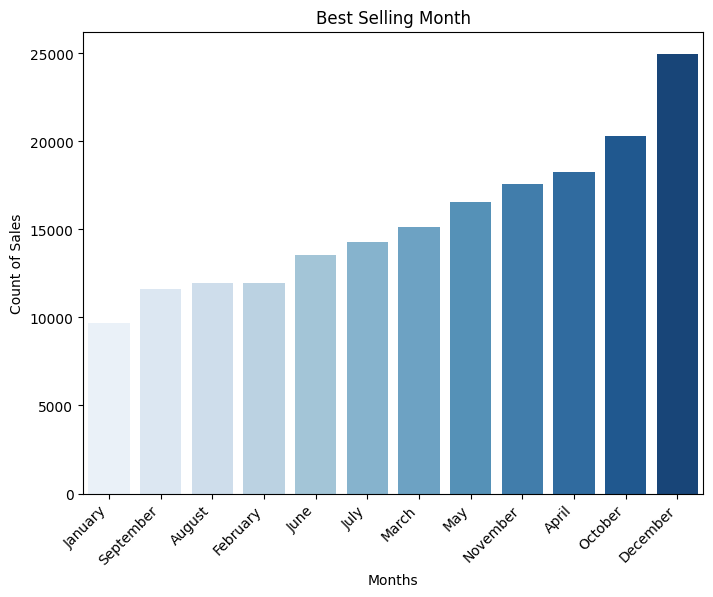

In [15]:
month_sales = df["Order Date"].dt.month_name().value_counts(ascending=True)

plt.figure(figsize=(8,6))
sns.barplot(x=month_sales.index,
           y=month_sales.values,
           palette="Blues")

plt.title("Best Selling Month")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count of Sales")
plt.xlabel("Months")

plt.show()

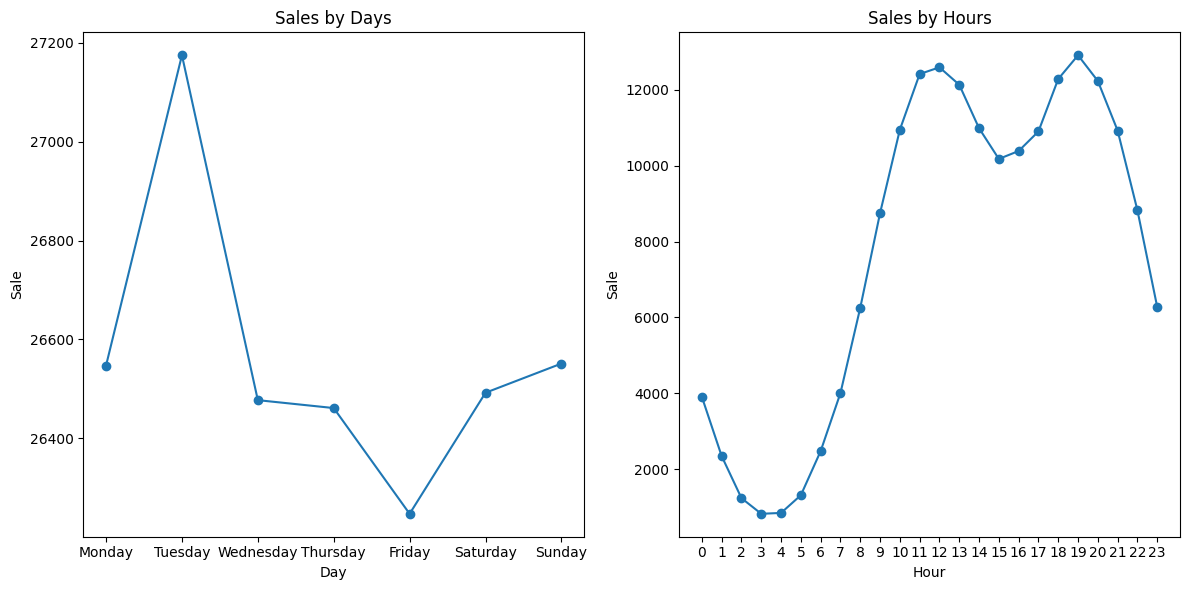

In [16]:
day_value = df["Order Date"].dt.day_name().value_counts().reindex(index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
hour_value =  df["Order Date"].dt.hour.value_counts().reindex(index = [i for i in range(0,24)])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(day_value.index, day_value.values, marker='o')

ax[0].set_title("Sales by Days")
ax[0].set_xlabel("Day")
ax[0].set_ylabel("Sale")


ax[1].plot(hour_value.index, hour_value.values, marker="o")
ax[1].set_title("Sales by Hours")
ax[1].set_xlabel("Hour")
ax[1].set_ylabel("Sale")
ax[1].set_xticks(range(24))

plt.tight_layout()
plt.show()




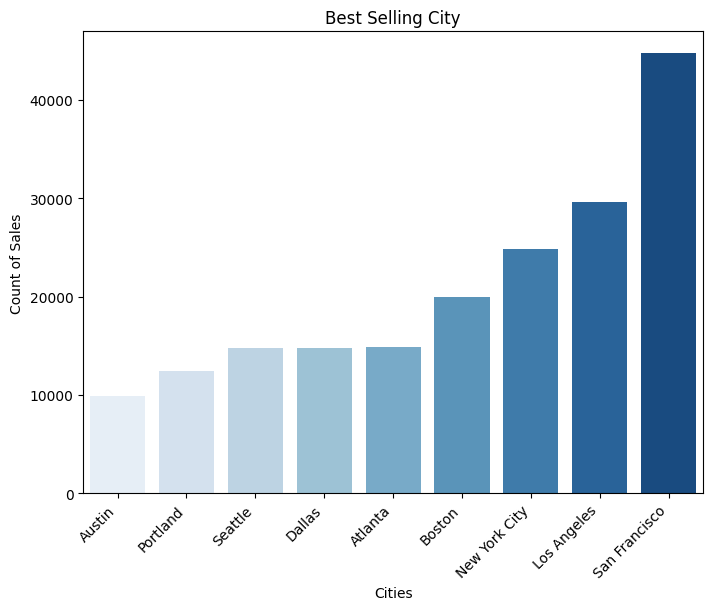

In [17]:
city_sales = df["City"].value_counts(ascending=True)

plt.figure(figsize=(8,6))
sns.barplot(x=city_sales.index,
           y=city_sales.values,
           palette="Blues")

plt.title("Best Selling City")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count of Sales")
plt.xlabel("Cities")

plt.show()

In [18]:
import plotly.graph_objects as go

city_counts = df.groupby(["City"])["State Code"].count()
state_counts = df.groupby(["State Code"])["City"].count()

fig = go.Figure(data=go.Choropleth(
    locations=state_counts.index,
    z=state_counts.values.astype(float),
    locationmode="USA-states",
    colorscale="Blues",
    colorbar_title="Number of Sales",
    text=[f"Count of Sales: {count}<br>City: {', '.join(df[df['State Code'] == state]['City'].unique())}" for state, count in zip(state_counts.index, state_counts.values)]
))

fig.update_layout(
    title_text="🗺️ Number of Sales by State",
    geo_scope="usa"
)

fig.show()


In [19]:
df[df["City"] == "Portland"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street,City,State Code,Zip Code
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,149 7th St,Portland,OR,97035
12,236682,AA Batteries (4-pack),1,3.84,2019-08-19 12:40:00,118 Johnson St,Portland,OR,97035
23,236693,27in 4K Gaming Monitor,1,389.99,2019-08-12 21:57:00,173 West St,Portland,OR,97035
45,236715,27in 4K Gaming Monitor,1,389.99,2019-08-23 11:20:00,628 Jefferson St,Portland,OR,97035
59,236728,ThinkPad Laptop,1,999.99,2019-08-10 11:21:00,526 North St,Portland,ME,04101
...,...,...,...,...,...,...,...,...,...
185916,319637,Wired Headphones,1,11.99,2019-12-31 22:14:00,641 Adams St,Portland,OR,97035
185917,319638,USB-C Charging Cable,1,11.95,2019-12-22 19:08:00,235 Spruce St,Portland,OR,97035
185920,319641,Macbook Pro Laptop,1,1700.00,2019-12-04 23:11:00,232 Meadow St,Portland,OR,97035
185936,319657,LG Dryer,1,600.00,2019-12-05 13:22:00,159 Lake St,Portland,OR,97035


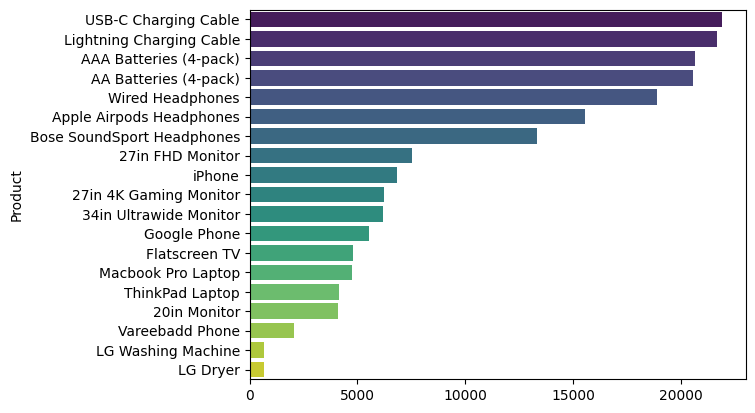

In [20]:
product_value = df["Product"].value_counts()

sns.barplot(y = product_value.index,
            x= product_value.values,
            palette="viridis",
            orient="h")

plt.show()

In [21]:
filtered_df = df[df.duplicated(subset="Order ID", keep=False)]

In [22]:
filtered_df = filtered_df.groupby("Order ID").agg({'Product': ', '.join}).reset_index()

In [24]:
filtered_df[filtered_df["Product"].str.count(",") == 4]

,Order ID,Product
784,160873,"iPhone, Lightning Charging Cable, Apple Airpod..."


In [25]:
filtered_df

,Order ID,Product
0,141275,"USB-C Charging Cable, Wired Headphones"
1,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
2,141365,"Vareebadd Phone, Wired Headphones"
3,141384,"Google Phone, USB-C Charging Cable"
4,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
7131,319536,"Macbook Pro Laptop, Wired Headphones"
7132,319556,"Google Phone, Wired Headphones"
7133,319584,"iPhone, Wired Headphones"
7134,319596,"iPhone, Lightning Charging Cable"


In [26]:
from itertools import combinations
from collections import Counter

filtered_df["ProductList"] = filtered_df['Product'].apply(lambda x: x.split(', '))


combinations_list = [tuple(sorted(combination)) for row in filtered_df["ProductList"] for combination in combinations(row, 2)]


combination_counts = Counter(combinations_list)


most_common_combination = combination_counts.most_common(1)[0]

print("Most common combination:", most_common_combination)

Most common combination: (('Lightning Charging Cable', 'iPhone'), 1015)


In [27]:
comb_df = pd.DataFrame(list(combination_counts.items()), columns=["Product", "Count"]).sort_values(by="Count", ascending=False).reset_index(drop=True)

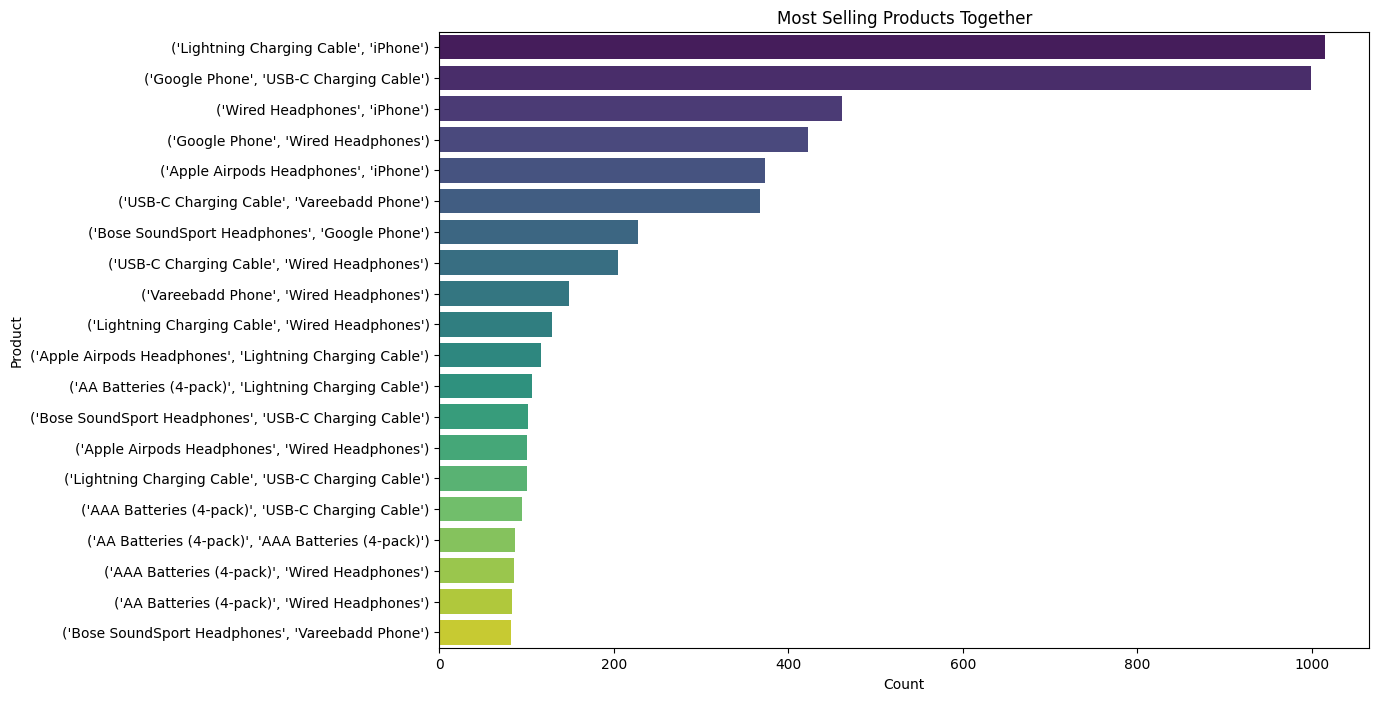

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(data = comb_df.head(20),
            x = "Count",
            y= "Product",
            palette="viridis",
            orient="h")

plt.title("Most Selling Products Together")
plt.show()

# **The End!** 